In [2]:
!pip install -e /Users/ilian/Desktop/research_projects/c3ai-covidchallenge/.

Obtaining file:///Users/ilian/Desktop/research_projects/c3ai-covidchallenge
  Using cached numpy-1.19.2-cp37-cp37m-macosx_10_9_x86_64.whl (15.3 MB)
  Using cached pandas-1.1.2-cp37-cp37m-macosx_10_9_x86_64.whl (10.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4
  Running setup.py develop for c3api
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.


# Download and Extract excel

In [3]:
! wget https://www2.census.gov/programs-surveys/nonemployer-statistics/tables/2018/combine18_xslx.zip
! unzip combine18_xslx.zip
! ls
! pip install xlrd

--2020-11-08 19:35:09--  https://www2.census.gov/programs-surveys/nonemployer-statistics/tables/2018/combine18_xslx.zip
Resolving www2.census.gov (www2.census.gov)... 2600:1406:1400:6a7::208c, 2600:1406:1400:68d::208c, 104.91.176.162
Connecting to www2.census.gov (www2.census.gov)|2600:1406:1400:6a7::208c|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60042662 (57M) [application/zip]
Saving to: ‘combine18_xslx.zip’

combine18_xslx.zip  100%[===================>]  57.26M  11.8MB/s    in 4.9s    

2020-11-08 19:35:14 (11.6 MB/s) - ‘combine18_xslx.zip’ saved [60042662/60042662]

Archive:  combine18_xslx.zip
  inflating: combine18.xlsx          
IlianHHerziResume_.pdf
Introducing EvoGrad_ A Lightweight Library for Gradient-Based Evolution _ Uber Engineering Blog.pdf
RamanathanICCV2015.pdf
brainmap
c3ai_covid_competition.ipynb
combine18.xlsx
combine18_xslx.zip
concept.htm
concept.mht
concept_files
download.htm
download_files
mindmap.html
visla.jpg
visla.png
  Usin

In [5]:
# extract excel file
import xlrd
import csv

wb = xlrd.open_workbook('combine18.xlsx', True)
print(wb.sheet_names())
for name in wb.sheet_names():
  with open(f'{name}_data.csv', 'w') as csv_file: 
    sh = wb.sheet_by_name(name)
    wr = csv.writer(csv_file, quoting=csv.QUOTE_ALL)
    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))



['Data', 'Definitions', 'Notes']


In [308]:
import pandas as pd
data = pd.read_csv('Data_data.csv')
print(data.shape)
columns = data.iloc[5]
data = data.iloc[6:]
data.columns = columns
data.tail()

/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(576442, 20)


5,State FIPS,State,County FIPS,County,2017 NAICS Code,2017 NAICS Description,Total CBP and NES Establishments,CBP Establishments Percentage,NES Establishments Percentage,CBP Establishments,"CBP Employment, including March 12th",CBP Employment Noise Flag,CBP First Quarter Payroll (in thousands),CBP First Quarter Payroll Noise Flag,CBP Annual Payroll (in thousands),CBP Annual Payroll Noise Flag,NES Establishments,NES Receipts (in thousands),NES Receipts Noise Flag,NaN
576437,56,Wyoming,999,Statewide Wyoming,611.0,Educational Services,N,N,N,6.0,21.0,J,74.0,G,294.0,G,N,N,N,NaN
576438,56,Wyoming,999,Statewide Wyoming,6113.0,"Colleges, Universities, and Professional Schools",N,N,N,3.0,17.0,G,50.0,H,190.0,G,N,N,N,NaN
576439,56,Wyoming,999,Statewide Wyoming,62.0,Health Care and Social Assistance,N,N,N,3.0,25.0,H,232.0,G,761.0,G,N,N,N,NaN
576440,56,Wyoming,999,Statewide Wyoming,621.0,Ambulatory Health Care Services,N,N,N,3.0,25.0,H,232.0,G,761.0,G,N,N,N,NaN
576441,56,Wyoming,999,Statewide Wyoming,81.0,Other Services (except Public Administration),N,N,N,3.0,12.0,J,452.0,H,1803.0,H,N,N,N,NaN


# Sector Activities by County

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(series, figsize=(10,5), orient='h'):
  #series = series.value_counts()
  if orient == 'h':
    plt.figure(figsize=(figsize[1], figsize[0]))
    ax = sns.barplot(y=series.index.values, x=series, orient='h')
    ax.set_xticklabels(ax.get_xticklabels(), 
                      rotation=90, 
                      horizontalalignment='right')
  elif orient == 'v':

    plt.figure(figsize=figsize)

    ax = sns.barplot(x=series.index.values, y=series, orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), 
                      rotation=90, 
                      horizontalalignment='right');

In [311]:
def get_rid_of_dashes(v):
  if '-' not in v:
    return v
  else:
    return v[:2] + '.0'

def get_rid_of_N_value(v):
  if v == 'N' or v == 'S':
    return 0
  else:
    return float(v)

def clean_values(industries, 
                 keys=['2017 NAICS Code', 'CBP Establishments',  'NES Establishments']):
    for key in keys:
      assert key in industries.columns
    industries['2017 NAICS Code'] = industries['2017 NAICS Code'].apply(get_rid_of_dashes)
    industries['NES Establishments'] = industries['NES Establishments'].apply(get_rid_of_N_value)
    industries['CBP Establishments'] = industries['CBP Establishments'].apply(get_rid_of_N_value)
    return industries

def filter_county(data, county_name):
  return data[county_name == data['County']]

def select_cols(data, 
                               cols=['2017 NAICS Code', '2017 NAICS Description', 'CBP Establishments',  'NES Establishments']):
  return data[cols]


# change these helper functions to select the industries 

def filter_by_nac_code(industries, sector_range):
  return industries[(industries['2017 NAICS Code'].apply(lambda v: float(v)) < sector_range[1]) & (industries['2017 NAICS Code'].apply(lambda v: float(v)) >= sector_range[0])]

def find_sector_counts(industries, sector_range):
  sector = filter_by_nac_code(industries, sector_range)
  sector['Total CBP and NES Establishments'] = sector['CBP Establishments'] + sector['NES Establishments']
  sector_counts = sector.groupby(by='2017 NAICS Description').agg(sum) #.drop('Total')
  return sector_counts
  

In [312]:
def activities_by_county(data, county_name=None, sector_ranges=([(10, 100)])):
  if county_name:
    data = filter_county(data, county_name)

  industries = select_cols(data)
  industries = clean_values(industries)

  sector_counts = []
  for code_range in sector_ranges:
    sector_counts.append(find_sector_counts(industries, code_range))
  #return sector_counts
  return pd.concat(sector_counts, axis=0)



/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Total number of industries in the United States of America


/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


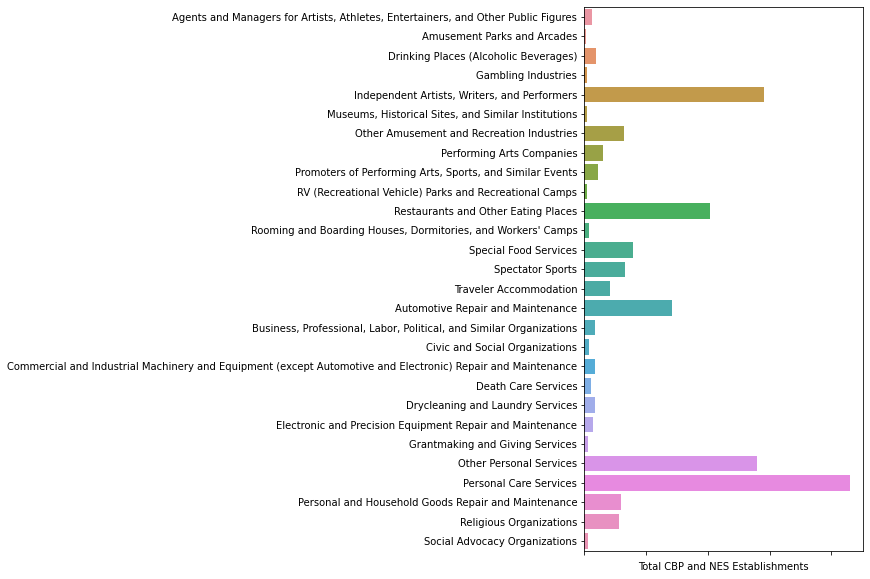

In [313]:
# all counties by subsector
sector_counts = activities_by_county(data, sector_ranges=[[7000, 7999], [8000, 8999]])

print('Total number of industries in the United States of America')
barplot(sector_counts.iloc[:, 2], orient='h')

In [314]:
activities_by_county(data, county_name='Statewide Wyoming')

/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

5,CBP Establishments,NES Establishments,Total CBP and NES Establishments
2017 NAICS Description,,,
Administrative and Support and Waste Management and Remediation Services,25.0,0,25.0
Educational Services,6.0,0,6.0
Finance and Insurance,39.0,0,39.0
Health Care and Social Assistance,3.0,0,3.0
Information,16.0,0,16.0
"Mining, Quarrying, and Oil and Gas Extraction",30.0,0,30.0
Other Services (except Public Administration),3.0,0,3.0
"Professional, Scientific, and Technical Services",26.0,0,26.0
Real Estate and Rental and Leasing,3.0,0,3.0


# DataLake API


## List of counties

In [1]:
!pip install -e /Users/ilian/Desktop/research_projects/c3ai-covidchallenge/.

Obtaining file:///Users/ilian/Desktop/research_projects/c3ai-covidchallenge
  Attempting uninstall: c3api
    Found existing installation: c3api 1.0.0
    Uninstalling c3api-1.0.0:
      Successfully uninstalled c3api-1.0.0
  Running setup.py develop for c3api


In [316]:
import c3api
from tqdm import tqdm
import pandas as pd

In [317]:
def data_in_index(row, col_name='index'):
  return 'data' in row[col_name]

In [4]:
from c3api import c3aidatalake
counties = c3aidatalake.fetch(
    "outbreaklocation",
    {
        "spec" : {
            "filter" : "contains(id, 'UnitedStates') && locationType == 'county'"
        }
    },
    get_all = True
)
counties

/Users/ilian/Desktop/research_projects/c3ai-covidchallenge/c3api/c3aidatalake.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  new_df = pd.io.json.json_normalize(response_json['objs'])


,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id
0,6.0,25.0,25.0,24527.0,24527.0,10090.0,9633.0,457.0,4.529237,10090.0,county,24527.0,Abbeville_SouthCarolina_UnitedStates,Abbeville,EP_LOC,Abbeville_SouthCarolina_UnitedStates,2020-11-07T00:00:00Z,45001
1,7.0,171.0,186.0,62045.0,62045.0,24074.0,22369.0,1705.0,7.082329,24074.0,county,62045.0,Acadia_Louisiana_UnitedStates,Acadia,EP_LOC,Acadia_Louisiana_UnitedStates,2020-11-07T00:00:00Z,22001
2,10.0,46.0,52.0,32316.0,32316.0,16001.0,15096.0,905.0,5.655897,16001.0,county,32316.0,Accomack_Virginia_UnitedStates,Accomack,EP_LOC,Accomack_Virginia_UnitedStates,2020-11-07T00:00:00Z,51001
3,97.0,1195.0,1305.0,481587.0,481587.0,263531.0,248015.0,15516.0,5.887732,263531.0,county,481587.0,Ada_Idaho_UnitedStates,Ada,EP_LOC,Ada_Idaho_UnitedStates,2020-11-07T00:00:00Z,16001
4,4.0,25.0,25.0,7152.0,7152.0,3862.0,3747.0,115.0,2.977732,3862.0,county,7152.0,Adair_Iowa_UnitedStates,Adair,EP_LOC,Adair_Iowa_UnitedStates,2020-11-07T00:00:00Z,19001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,42.0,447.0,456.0,213787.0,213787.0,97557.0,80938.0,16619.0,17.035169,97557.0,county,213787.0,Yuma_Arizona_UnitedStates,Yuma,EP_LOC,Yuma_Arizona_UnitedStates,2020-11-07T00:00:00Z,04027
1226,6.0,30.0,30.0,10019.0,10019.0,5010.0,4868.0,142.0,2.834331,5010.0,county,10019.0,Yuma_Colorado_UnitedStates,Yuma,EP_LOC,Yuma_Colorado_UnitedStates,2020-11-07T00:00:00Z,08125
1227,NaN,NaN,NaN,14179.0,14179.0,4947.0,4268.0,679.0,13.725490,4947.0,county,14179.0,Zapata_Texas_UnitedStates,Zapata,EP_LOC,Zapata_Texas_UnitedStates,2020-11-07T00:00:00Z,48505
1228,NaN,NaN,NaN,11840.0,11840.0,3309.0,2748.0,561.0,16.953762,3309.0,county,11840.0,Zavala_Texas_UnitedStates,Zavala,EP_LOC,Zavala_Texas_UnitedStates,2020-11-07T00:00:00Z,48507


In [318]:
counties[counties['id'] == 'FairfaxCity_Virginia_UnitedStates']

,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id
928,NaN,NaN,NaN,NaN,NaN,13072.0,12388.0,684.0,5.232558,13072.0,county,24019.0,FairfaxCity_Virginia_UnitedStates,FairfaxCity,EP_LOC,FairfaxCity_Virginia_UnitedStates,2020-11-07T00:00:00Z,51600


In [319]:
counties[counties['id'] == 'Fairfax_Virginia_UnitedStates']

,hospitalIcuBeds,hospitalStaffedBeds,hospitalLicensedBeds,latestTotalPopulation,populationOfAllChildren,latestLaborForce,latestEmployedPopulation,latestUnemployedPopulation,latestUnemploymentRate,laborForceOfAllChildren,locationType,populationCDS,id,name,typeIdent,location.value.id,location.timestamp,fips.id
929,NaN,NaN,NaN,24019.0,24019.0,619663.0,584310.0,35353.0,5.705198,619663.0,county,1147532.0,Fairfax_Virginia_UnitedStates,Fairfax,EP_LOC,Fairfax_Virginia_UnitedStates,2020-11-07T00:00:00Z,51059


## Eval Metrics 
> see <a href=https://c3.ai/covid-19-api-documentation/#tag/OutbreakLocation/paths/~1api~11~1outbreaklocation~1evalmetrics/post>  docs </a> for more info. 

Essentially, need to specify a datasource initally when pulling the data
datasource_names=[
  JHU,
  CovidTrackingProject,
  ECDC_ConfirmedCases,
  NYT,
  WHO, 
  etc.
]


### Getting JHU case counts

In [320]:
print(len(list(counties['id'].values)))

3230


In [736]:
today = pd.Timestamp.now().strftime("%Y-%m-%d")
all_counties_time = []
ids = list(counties['id'].values)
for i in tqdm(range(counties.shape[0] // 10), total=counties.shape[0] // 10):
    counties_time = c3aidatalake.evalmetrics(
        "outbreaklocation",
        {
            "spec" : {
                "ids": ids[i * 10: i * 10 + 10],
                "expressions" : ["JHU_ConfirmedCases"],
                "start" : "2020-01-01",
                "end" : today,
                "interval" : "DAY",
            #"filter" : "type == 'County'"
            }
        }
    )
    all_counties_time +=[counties_time]

len(all_counties_time)

  0%|          | 0/323 [00:00<?, ?it/s]/Users/ilian/Desktop/research_projects/c3ai-covidchallenge/c3api/c3aidatalake.py:91: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pd.io.json.json_normalize(response_json['result'])
100%|██████████| 323/323 [05:11<00:00,  1.04it/s]


323

In [738]:
all_counties_cases = pd.concat(all_counties_time, axis=1)

In [739]:
all_counties_cases.shape

(314, 6783)

In [740]:
def data_in_index(row, col_name='index'):
  return 'data' in row[col_name]
indicies = all_counties_cases.transpose().reset_index().apply(data_in_index, axis=1)
all_counties_cases = all_counties_cases.transpose()[indicies.values.reshape(-1)].transpose()

In [741]:
all_counties_cases.mean()

Abbeville_SouthCarolina_UnitedStates.JHU_ConfirmedCases.data     207.417197
Acadia_Louisiana_UnitedStates.JHU_ConfirmedCases.data           1184.254777
Adair_Iowa_UnitedStates.JHU_ConfirmedCases.data                   31.872611
Adair_Oklahoma_UnitedStates.JHU_ConfirmedCases.data              223.792994
Adams_Idaho_UnitedStates.JHU_ConfirmedCases.data                  12.920382
                                                                   ...     
Zapata_Texas_UnitedStates.JHU_ConfirmedCases.data                107.707006
Yuma_Colorado_UnitedStates.JHU_ConfirmedCases.data                50.171975
York_SouthCarolina_UnitedStates.JHU_ConfirmedCases.data         1978.089172
Ziebach_SouthDakota_UnitedStates.JHU_ConfirmedCases.data          20.589172
Young_Texas_UnitedStates.JHU_ConfirmedCases.data                 111.579618
Length: 3230, dtype: float64

## Getting County Population Counts

In [743]:
all_counties_pop = counties[['id', 'populationCDS']]#pd.concat(all_county_pop, axis=1).drop('dates', axis=1).transpose()
all_counties_pop.columns=['county', 'population']

In [744]:
print(all_counties_pop.shape)
all_counties_pop.head()

(3230, 2)


,county,population
0,Abbeville_SouthCarolina_UnitedStates,24527.0
1,Acadia_Louisiana_UnitedStates,62045.0
2,Accomack_Virginia_UnitedStates,32316.0
3,Ada_Idaho_UnitedStates,481587.0
4,Adair_Iowa_UnitedStates,7152.0


In [746]:
all_counties_pop

,county,population
0,Abbeville_SouthCarolina_UnitedStates,24527.0
1,Acadia_Louisiana_UnitedStates,62045.0
2,Accomack_Virginia_UnitedStates,32316.0
3,Ada_Idaho_UnitedStates,481587.0
4,Adair_Iowa_UnitedStates,7152.0
...,...,...
1225,Yuma_Arizona_UnitedStates,213787.0
1226,Yuma_Colorado_UnitedStates,10019.0
1227,Zapata_Texas_UnitedStates,14179.0
1228,Zavala_Texas_UnitedStates,11840.0


# Merge the case counts, the population, and the activity distributions

In [747]:
print(all_counties_pop.shape)
print(all_counties_cases.mean().shape)

(3230, 2)
(3230,)


In [748]:
all_counties_cases.head()

,Abbeville_SouthCarolina_UnitedStates.JHU_ConfirmedCases.data,Acadia_Louisiana_UnitedStates.JHU_ConfirmedCases.data,Adair_Iowa_UnitedStates.JHU_ConfirmedCases.data,Adair_Oklahoma_UnitedStates.JHU_ConfirmedCases.data,Adams_Idaho_UnitedStates.JHU_ConfirmedCases.data,Adams_Colorado_UnitedStates.JHU_ConfirmedCases.data,Ada_Idaho_UnitedStates.JHU_ConfirmedCases.data,Adair_Kentucky_UnitedStates.JHU_ConfirmedCases.data,Adair_Missouri_UnitedStates.JHU_ConfirmedCases.data,Accomack_Virginia_UnitedStates.JHU_ConfirmedCases.data,...,York_Virginia_UnitedStates.JHU_ConfirmedCases.data,Zavala_Texas_UnitedStates.JHU_ConfirmedCases.data,Yukon-Koyukuk_Alaska_UnitedStates.JHU_ConfirmedCases.data,Yuma_Arizona_UnitedStates.JHU_ConfirmedCases.data,Yuba_California_UnitedStates.JHU_ConfirmedCases.data,Zapata_Texas_UnitedStates.JHU_ConfirmedCases.data,Yuma_Colorado_UnitedStates.JHU_ConfirmedCases.data,York_SouthCarolina_UnitedStates.JHU_ConfirmedCases.data,Ziebach_SouthDakota_UnitedStates.JHU_ConfirmedCases.data,Young_Texas_UnitedStates.JHU_ConfirmedCases.data
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [749]:
import re
re.findall('[a-zA-z_]+\.', 'Abbeville_SouthCarolina_UnitedStates.JHU_ConfirmedCases.data')

['Abbeville_SouthCarolina_UnitedStates.', 'JHU_ConfirmedCases.']

In [750]:
all_counties_cases.transpose().reset_index().sort_values('index')

,index,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Abbeville_SouthCarolina_UnitedStates.JHU_Confi...,0,0,0,0,0,0,0,0,0,...,801,801,806,808,808,808,808,836,839,839
1,Acadia_Louisiana_UnitedStates.JHU_ConfirmedCas...,0,0,0,0,0,0,0,0,0,...,3169,3169,3183,3291,3294,3294,3294,3330,3330,3370
9,Accomack_Virginia_UnitedStates.JHU_ConfirmedCa...,0,0,0,0,0,0,0,0,0,...,1223,1227,1229,1229,1232,1236,1237,1239,1239,1239
6,Ada_Idaho_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,17326,17451,17499,17828,18110,18311,18618,18618,19325,19665
2,Adair_Iowa_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,220,220,220,250,251,251,251,251,251,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,Yuma_Arizona_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,13930,13994,14041,14071,14101,14219,14270,14270,14512,14534
3226,Yuma_Colorado_UnitedStates.JHU_ConfirmedCases....,0,0,0,0,0,0,0,0,0,...,227,227,227,229,230,239,243,246,246,252
3225,Zapata_Texas_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,352,352,358,361,361,361,361,366,366,366
3221,Zavala_Texas_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,463,463,470,474,474,474,474,483,483,483


In [751]:
import re
errors = {}
for i, (county_1, county_2) in enumerate(zip(all_counties_cases.transpose().reset_index().sort_values('index')['index'].values, all_counties_pop['county'].values)):
  county_1 = re.sub('\.JHU_ConfirmedCases\.data', "", county_1)
  #county_2 = re.findall('[a-zA-z_]+\.', county_2)[0]
  print(county_1, county_2)

  assert county_1 == county_2, print(i, county_1, county_2)
#   if county_1 != county_2:
#     errors[i] = [county_1, county_2]
def _get_county(county):
  county = re.sub('\.JHU_ConfirmedCases\.data', "", county)
  return county

Abbeville_SouthCarolina_UnitedStates Abbeville_SouthCarolina_UnitedStates
Acadia_Louisiana_UnitedStates Acadia_Louisiana_UnitedStates
Accomack_Virginia_UnitedStates Accomack_Virginia_UnitedStates
Ada_Idaho_UnitedStates Ada_Idaho_UnitedStates
Adair_Iowa_UnitedStates Adair_Iowa_UnitedStates
Adair_Kentucky_UnitedStates Adair_Kentucky_UnitedStates
Adair_Missouri_UnitedStates Adair_Missouri_UnitedStates
Adair_Oklahoma_UnitedStates Adair_Oklahoma_UnitedStates
Adams_Colorado_UnitedStates Adams_Colorado_UnitedStates
Adams_Idaho_UnitedStates Adams_Idaho_UnitedStates
Adams_Illinois_UnitedStates Adams_Illinois_UnitedStates
Adams_Indiana_UnitedStates Adams_Indiana_UnitedStates
Adams_Iowa_UnitedStates Adams_Iowa_UnitedStates
Adams_Mississippi_UnitedStates Adams_Mississippi_UnitedStates
Adams_Nebraska_UnitedStates Adams_Nebraska_UnitedStates
Adams_NorthDakota_UnitedStates Adams_NorthDakota_UnitedStates
Adams_Ohio_UnitedStates Adams_Ohio_UnitedStates
Adams_Pennsylvania_UnitedStates Adams_Pennsylvania

Emporia_Virginia_UnitedStates Emporia_Virginia_UnitedStates
Erath_Texas_UnitedStates Erath_Texas_UnitedStates
Erie_NewYork_UnitedStates Erie_NewYork_UnitedStates
Erie_Ohio_UnitedStates Erie_Ohio_UnitedStates
Erie_Pennsylvania_UnitedStates Erie_Pennsylvania_UnitedStates
Escambia_Alabama_UnitedStates Escambia_Alabama_UnitedStates
Escambia_Florida_UnitedStates Escambia_Florida_UnitedStates
Esmeralda_Nevada_UnitedStates Esmeralda_Nevada_UnitedStates
Essex_Massachusetts_UnitedStates Essex_Massachusetts_UnitedStates
Essex_NewJersey_UnitedStates Essex_NewJersey_UnitedStates
Essex_NewYork_UnitedStates Essex_NewYork_UnitedStates
Essex_Vermont_UnitedStates Essex_Vermont_UnitedStates
Essex_Virginia_UnitedStates Essex_Virginia_UnitedStates
Estill_Kentucky_UnitedStates Estill_Kentucky_UnitedStates
Etowah_Alabama_UnitedStates Etowah_Alabama_UnitedStates
Eureka_Nevada_UnitedStates Eureka_Nevada_UnitedStates
Evangeline_Louisiana_UnitedStates Evangeline_Louisiana_UnitedStates
Evans_Georgia_UnitedStates

Hoonah-Angoon_Alaska_UnitedStates Hoonah-Angoon_Alaska_UnitedStates
Hopewell_Virginia_UnitedStates Hopewell_Virginia_UnitedStates
Hopkins_Kentucky_UnitedStates Hopkins_Kentucky_UnitedStates
Hopkins_Texas_UnitedStates Hopkins_Texas_UnitedStates
Hormigueros_PuertoRico_UnitedStates Hormigueros_PuertoRico_UnitedStates
Horry_SouthCarolina_UnitedStates Horry_SouthCarolina_UnitedStates
HotSpring_Arkansas_UnitedStates HotSpring_Arkansas_UnitedStates
HotSprings_Wyoming_UnitedStates HotSprings_Wyoming_UnitedStates
Houghton_Michigan_UnitedStates Houghton_Michigan_UnitedStates
Houston_Alabama_UnitedStates Houston_Alabama_UnitedStates
Houston_Georgia_UnitedStates Houston_Georgia_UnitedStates
Houston_Minnesota_UnitedStates Houston_Minnesota_UnitedStates
Houston_Tennessee_UnitedStates Houston_Tennessee_UnitedStates
Houston_Texas_UnitedStates Houston_Texas_UnitedStates
Howard_Arkansas_UnitedStates Howard_Arkansas_UnitedStates
Howard_Indiana_UnitedStates Howard_Indiana_UnitedStates
Howard_Iowa_UnitedSt

McDowell_WestVirginia_UnitedStates McDowell_WestVirginia_UnitedStates
McDuffie_Georgia_UnitedStates McDuffie_Georgia_UnitedStates
McHenry_Illinois_UnitedStates McHenry_Illinois_UnitedStates
McHenry_NorthDakota_UnitedStates McHenry_NorthDakota_UnitedStates
McIntosh_Georgia_UnitedStates McIntosh_Georgia_UnitedStates
McIntosh_NorthDakota_UnitedStates McIntosh_NorthDakota_UnitedStates
McIntosh_Oklahoma_UnitedStates McIntosh_Oklahoma_UnitedStates
McKean_Pennsylvania_UnitedStates McKean_Pennsylvania_UnitedStates
McKenzie_NorthDakota_UnitedStates McKenzie_NorthDakota_UnitedStates
McKinley_NewMexico_UnitedStates McKinley_NewMexico_UnitedStates
McLean_Illinois_UnitedStates McLean_Illinois_UnitedStates
McLean_Kentucky_UnitedStates McLean_Kentucky_UnitedStates
McLean_NorthDakota_UnitedStates McLean_NorthDakota_UnitedStates
McLennan_Texas_UnitedStates McLennan_Texas_UnitedStates
McLeod_Minnesota_UnitedStates McLeod_Minnesota_UnitedStates
McMinn_Tennessee_UnitedStates McMinn_Tennessee_UnitedStates


Sheboygan_Wisconsin_UnitedStates Sheboygan_Wisconsin_UnitedStates
Shelby_Alabama_UnitedStates Shelby_Alabama_UnitedStates
Shelby_Illinois_UnitedStates Shelby_Illinois_UnitedStates
Shelby_Indiana_UnitedStates Shelby_Indiana_UnitedStates
Shelby_Iowa_UnitedStates Shelby_Iowa_UnitedStates
Shelby_Kentucky_UnitedStates Shelby_Kentucky_UnitedStates
Shelby_Missouri_UnitedStates Shelby_Missouri_UnitedStates
Shelby_Ohio_UnitedStates Shelby_Ohio_UnitedStates
Shelby_Tennessee_UnitedStates Shelby_Tennessee_UnitedStates
Shelby_Texas_UnitedStates Shelby_Texas_UnitedStates
Shenandoah_Virginia_UnitedStates Shenandoah_Virginia_UnitedStates
Sherburne_Minnesota_UnitedStates Sherburne_Minnesota_UnitedStates
Sheridan_Kansas_UnitedStates Sheridan_Kansas_UnitedStates
Sheridan_Montana_UnitedStates Sheridan_Montana_UnitedStates
Sheridan_Nebraska_UnitedStates Sheridan_Nebraska_UnitedStates
Sheridan_NorthDakota_UnitedStates Sheridan_NorthDakota_UnitedStates
Sheridan_Wyoming_UnitedStates Sheridan_Wyoming_UnitedSta

In [752]:
all_counties_cases.transpose().shape

(3230, 314)

In [753]:
(all_counties_cases.transpose().reset_index()[
    all_counties_cases.transpose().reset_index().apply(lambda row: "Billings_NorthDakota_UnitedStates" in row['index'], axis=1)
]
)

,index,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,Billings_NorthDakota_UnitedStates.JHU_Confirme...,0,0,0,0,0,0,0,0,0,...,33,34,34,34,34,35,35,36,36,36


In [754]:
print(len(all_counties_pop['county'].apply(_get_county).values))
print(len(all_counties_pop['population'].values))
print(len(all_counties_cases.transpose().values))

3230
3230
3230


In [755]:
all_counties_cases = all_counties_cases.transpose().reset_index().sort_values('index')

In [823]:
all_counties_cases

,index,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Abbeville_SouthCarolina_UnitedStates.JHU_Confi...,0,0,0,0,0,0,0,0,0,...,801,801,806,808,808,808,808,836,839,839
1,Acadia_Louisiana_UnitedStates.JHU_ConfirmedCas...,0,0,0,0,0,0,0,0,0,...,3169,3169,3183,3291,3294,3294,3294,3330,3330,3370
9,Accomack_Virginia_UnitedStates.JHU_ConfirmedCa...,0,0,0,0,0,0,0,0,0,...,1223,1227,1229,1229,1232,1236,1237,1239,1239,1239
6,Ada_Idaho_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,17326,17451,17499,17828,18110,18311,18618,18618,19325,19665
2,Adair_Iowa_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,220,220,220,250,251,251,251,251,251,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,Yuma_Arizona_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,13930,13994,14041,14071,14101,14219,14270,14270,14512,14534
3226,Yuma_Colorado_UnitedStates.JHU_ConfirmedCases....,0,0,0,0,0,0,0,0,0,...,227,227,227,229,230,239,243,246,246,252
3225,Zapata_Texas_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,352,352,358,361,361,361,361,366,366,366
3221,Zavala_Texas_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,463,463,470,474,474,474,474,483,483,483


In [824]:
df = pd.DataFrame(list(zip(
    all_counties_pop['county'].apply(_get_county).values, 
    all_counties_pop['population'].values, 
    all_counties_cases.drop('index', axis=1).values
)))
df = df.explode(2)
df.columns = ['county', 'population', 'cases']


In [825]:
df[df["county"] == "Billings_NorthDakota_UnitedStates"]

,county,population,cases
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0
219,Billings_NorthDakota_UnitedStates,928.0,0


In [805]:
df.shape

(1014220, 3)

In [806]:
# apply cumulative sum here
all_counties_cases

,index,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Abbeville_SouthCarolina_UnitedStates.JHU_Confi...,0,0,0,0,0,0,0,0,0,...,801,801,806,808,808,808,808,836,839,839
1,Acadia_Louisiana_UnitedStates.JHU_ConfirmedCas...,0,0,0,0,0,0,0,0,0,...,3169,3169,3183,3291,3294,3294,3294,3330,3330,3370
9,Accomack_Virginia_UnitedStates.JHU_ConfirmedCa...,0,0,0,0,0,0,0,0,0,...,1223,1227,1229,1229,1232,1236,1237,1239,1239,1239
6,Ada_Idaho_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,17326,17451,17499,17828,18110,18311,18618,18618,19325,19665
2,Adair_Iowa_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,220,220,220,250,251,251,251,251,251,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,Yuma_Arizona_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,13930,13994,14041,14071,14101,14219,14270,14270,14512,14534
3226,Yuma_Colorado_UnitedStates.JHU_ConfirmedCases....,0,0,0,0,0,0,0,0,0,...,227,227,227,229,230,239,243,246,246,252
3225,Zapata_Texas_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,352,352,358,361,361,361,361,366,366,366
3221,Zavala_Texas_UnitedStates.JHU_ConfirmedCases.data,0,0,0,0,0,0,0,0,0,...,463,463,470,474,474,474,474,483,483,483


In [807]:
num_time = all_counties_cases.shape[0]
num_counties

3230

In [840]:
# create time feature
import numpy as np
num_time = 314
num_counties = len(all_counties_pop['county'])
df['day'] = np.tile(np.arange(num_time), num_counties)

In [841]:
df

,county,population,cases,day
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0,0
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0,1
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0,2
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0,3
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0,4
...,...,...,...,...
3229,Ziebach_SouthDakota_UnitedStates,2756.0,120,309
3229,Ziebach_SouthDakota_UnitedStates,2756.0,125,310
3229,Ziebach_SouthDakota_UnitedStates,2756.0,131,311
3229,Ziebach_SouthDakota_UnitedStates,2756.0,130,312


In [842]:
df.to_csv('./county_case_counts_pop.csv')

In [826]:
import numpy as np
data = pd.read_csv('Data_data.csv')
print(data.shape)
columns = data.iloc[5]
data = data.iloc[6:]
data.columns = columns
data.tail()
data['County'] = np.asarray([string.replace(' ', '') for string in ((data['County'] + '_' + data['State'] + '_UnitedStates').values)])

/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(576442, 20)


In [827]:
series = activities_by_county(data, county_name=df['county'].values[0])['Total CBP and NES Establishments']
activities_df = pd.DataFrame(series).transpose()

/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [832]:
len(np.unique(df['county'].values))

3230

In [829]:
import warnings
with warnings.catch_warnings(record=True):
    start=1
    for county in tqdm(np.unique(df['county'].values)[start:], total=len(np.unique(df['county'].values)[start:])):
      series = activities_by_county(data,county_name=county)['Total CBP and NES Establishments']
      activities_df = activities_df.append(pd.DataFrame(series).transpose())

100%|██████████| 3229/3229 [03:07<00:00, 17.22it/s]


In [830]:
activities_df.head()

,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information,Manufacturing,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade,Management of Companies and Enterprises,Industries not classified,"Mining, Quarrying, and Oil and Gas Extraction"
Total CBP and NES Establishments,66.0,209.0,19.0,54.0,248.0,38.0,56.0,188.0,18.0,73.0,295.0,126.0,71.0,207.0,49.0,3.0,27.0,NaN,NaN,NaN
Total CBP and NES Establishments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total CBP and NES Establishments,137.0,366.0,276.0,111.0,396.0,32.0,71.0,176.0,32.0,60.0,358.0,262.0,280.0,359.0,125.0,5.0,60.0,3.0,NaN,NaN
Total CBP and NES Establishments,1558.0,3703.0,276.0,2752.0,5191.0,1732.0,2447.0,4604.0,924.0,1097.0,5204.0,9008.0,7306.0,5611.0,2856.0,66.0,1267.0,108.0,18.0,48.0
Total CBP and NES Establishments,26.0,72.0,46.0,30.0,108.0,6.0,44.0,66.0,3.0,13.0,93.0,62.0,62.0,105.0,35.0,7.0,18.0,NaN,4.0,NaN


In [834]:
activities_df = activities_df.reset_index(drop=True)
activities_df['county'] = np.unique(df['county'].values)
activities_df=activities_df[['county', *activities_df.columns.values[:-1]]]

In [835]:
activities_df.to_csv('./activities_by_county.csv')

### use saved csv files

In [394]:
# from google.colab import drive
# import pandas as pd
# drive.mount("/content/gdrive")

In [395]:
# df = pd.read_csv('/content/gdrive/My Drive/county_case_counts_pop.csv')
# activities_df = pd.read_csv('/content/gdrive/My Drive/activites_by_county.csv')

In [836]:
activities_df.head()

,county,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information,...,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade,Management of Companies and Enterprises,Industries not classified,"Mining, Quarrying, and Oil and Gas Extraction"
0,Abbeville_SouthCarolina_UnitedStates,66.0,209.0,19.0,54.0,248.0,38.0,56.0,188.0,18.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,NaN,NaN,NaN
1,Acadia_Louisiana_UnitedStates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accomack_Virginia_UnitedStates,137.0,366.0,276.0,111.0,396.0,32.0,71.0,176.0,32.0,...,358.0,262.0,280.0,359.0,125.0,5.0,60.0,3.0,NaN,NaN
3,Ada_Idaho_UnitedStates,1558.0,3703.0,276.0,2752.0,5191.0,1732.0,2447.0,4604.0,924.0,...,5204.0,9008.0,7306.0,5611.0,2856.0,66.0,1267.0,108.0,18.0,48.0
4,Adair_Iowa_UnitedStates,26.0,72.0,46.0,30.0,108.0,6.0,44.0,66.0,3.0,...,93.0,62.0,62.0,105.0,35.0,7.0,18.0,NaN,4.0,NaN


In [837]:
activities_df.shape

(3230, 21)

In [838]:
print(df.shape)
df.head()

(1014220, 3)


,county,population,cases
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0


In [843]:
merged = pd.merge(df, activities_df, left_on='county', right_on='county', how='inner')
merged = merged.groupby(['county', 'population', 'cases', 'day']).agg(lambda v: v.iloc[0]).reset_index().fillna(0)

In [844]:
merged['population'] = merged['population'].apply(lambda v: float(v))

In [846]:
from IPython.display import display
pd.set_option('display.max_rows', 500)
display(merged.head(500))

,county,population,cases,day,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,...,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade,Management of Companies and Enterprises,Industries not classified,"Mining, Quarrying, and Oil and Gas Extraction"
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,0,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
1,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,1,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
2,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,2,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
3,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,3,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
4,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,4,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
5,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,5,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
6,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,6,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
7,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,7,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
8,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,8,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
9,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,9,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0


In [817]:
merged.shape

(3454, 24)

In [536]:
merged.to_csv("./cases_pop_activities.csv")

# Baseline classifier

In [849]:
# from google.colab import drive
# import pandas as pd
# import numpy as np
# drive.mount("/content/gdrive")

In [850]:
df = pd.read_csv('./cases_pop_activities.csv').fillna(0)

In [851]:
df.shape

(35497, 25)

In [852]:
df.head()

,Unnamed: 0,county,population,cases,day,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,...,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade,Management of Companies and Enterprises,Industries not classified,"Mining, Quarrying, and Oil and Gas Extraction"
0,0,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,0,66.0,209.0,19.0,54.0,248.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
1,1,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,1,66.0,209.0,19.0,54.0,248.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
2,2,Abbeville_SouthCarolina_UnitedStates,24527.0,4.0,2,66.0,209.0,19.0,54.0,248.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
3,3,Abbeville_SouthCarolina_UnitedStates,24527.0,31.0,3,66.0,209.0,19.0,54.0,248.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
4,4,Abbeville_SouthCarolina_UnitedStates,24527.0,42.0,4,66.0,209.0,19.0,54.0,248.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0


In [853]:
def has_listed_activities(row):
  for k,v in row.items():
    if v:
      return True
  return False

df = df[df.drop(['day', 'county', 'cases', 'population'], axis=1).apply(has_listed_activities, axis=1)]


In [854]:
df.columns

Index(['Unnamed: 0', 'county', 'population', 'cases', 'day',
       'Accommodation and Food Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Agriculture, Forestry, Fishing and Hunting',
       'Arts, Entertainment, and Recreation', 'Construction',
       'Educational Services', 'Finance and Insurance',
       'Health Care and Social Assistance', 'Information', 'Manufacturing',
       'Other Services (except Public Administration)',
       'Professional, Scientific, and Technical Services',
       'Real Estate and Rental and Leasing', 'Retail Trade',
       'Transportation and Warehousing', 'Utilities', 'Wholesale Trade',
       'Management of Companies and Enterprises', 'Industries not classified',
       'Mining, Quarrying, and Oil and Gas Extraction'],
      dtype='object')

In [855]:
df = df.iloc[:, 1:]

In [856]:
df.head(500)

,county,population,cases,day,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,...,Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade,Management of Companies and Enterprises,Industries not classified,"Mining, Quarrying, and Oil and Gas Extraction"
0,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,0,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
1,Abbeville_SouthCarolina_UnitedStates,24527.0,0.0,1,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
2,Abbeville_SouthCarolina_UnitedStates,24527.0,4.0,2,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
3,Abbeville_SouthCarolina_UnitedStates,24527.0,31.0,3,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
4,Abbeville_SouthCarolina_UnitedStates,24527.0,42.0,4,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
5,Abbeville_SouthCarolina_UnitedStates,24527.0,113.0,5,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
6,Abbeville_SouthCarolina_UnitedStates,24527.0,282.0,6,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
7,Abbeville_SouthCarolina_UnitedStates,24527.0,418.0,7,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
8,Abbeville_SouthCarolina_UnitedStates,24527.0,591.0,8,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0
9,Abbeville_SouthCarolina_UnitedStates,24527.0,801.0,9,66.0,209.0,19.0,54.0,248.0,38.0,...,295.0,126.0,71.0,207.0,49.0,3.0,27.0,0.0,0.0,0.0


In [857]:
df['cases_delta'] = np.zeros(df.shape[0])
df['cases_delta'].iloc[1:] = df['cases'].values[1:] - df['cases'].values[:-1]

/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [858]:
df.fillna(0, inplace=True)

In [859]:
# cumulative sum incorrect from data
df[df['cases_delta'] < 0] = 0.
df = df.fillna(0)

In [860]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

In [861]:
df.shape

(35497, 25)

In [862]:
from sklearn.preprocessing import StandardScaler
ssclr = StandardScaler()

In [667]:
df['percent_delta'] = df['cases_delta'] / df['population'] * 100

In [725]:
X = df.drop(['county'], axis=1).to_numpy()
ssclr.fit(X)
X = np.nan_to_num(ssclr.transform(X),0)
Y = df['cases_delta'] / df['population'] * 100 # [0,100]
gt = np.linspace(0,1,10000)
Y = np.digitize(Y, np, right=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [863]:
max(df['cases_delta'] / df['population'])

0.14698492462311558

In [770]:
gt = np.linspace(0,1,10000)

In [682]:
len(Y[Y == 0]) / len(Y)

0.16705637096092626

In [683]:
# plt.hist(Y, bins=np.arange(0, 10000, 100));

### Bayesian Ridge

In [684]:
# regression problem with no discretization
br_clf = BayesianRidge()
br_clf.fit(X_train,Y_train)
print(sum((br_clf.predict(X_train) - Y_train)**2))

174010816350.23288


In [685]:
print(sum((br_clf.predict(X_test) - Y_test)**2))

58482976813.61017


In [686]:
# discretizing the problems by applying the log transformation on the cases and binning them by exponents of .5
# so bins become negative_infiity, 10^0, 10^.5, 10^1, 10^1.5, 10^2, ...

In [687]:
list(br_clf.predict(X_test))

[4521.071757727415,
 2757.6300518737007,
 5854.600684224184,
 3815.9574811734537,
 4521.071757727415,
 2725.5484451452257,
 2673.781155505622,
 2042.153301732326,
 2510.8932385694807,
 3617.843187000097,
 2572.01100005182,
 4731.49053353022,
 2361.808976992693,
 2038.8028341032434,
 3244.846019870875,
 2046.2022751490747,
 2529.1863127317606,
 2350.250426996452,
 768.4378220407425,
 12781.979289282443,
 2415.3196344107137,
 3107.817568163812,
 1367.7630134503906,
 -458.4515569442424,
 2229.642253971331,
 1010.0232584575892,
 2009.5173741344524,
 2134.4713020524905,
 1324.4316643176435,
 4365.695074833954,
 2361.6381194063715,
 1686.5984089181202,
 2474.373253932632,
 1806.58915173235,
 2602.754970639685,
 2352.7276697727234,
 1791.4742117213718,
 4489.115856414739,
 256.3934283579724,
 2279.1268872494625,
 4521.071757727415,
 3642.559559435882,
 2817.318930014454,
 7053.354162329033,
 2648.3934783343743,
 2852.3211236989036,
 2611.514271156891,
 2080.7878344950614,
 4521.071757727415,


In [688]:
def relative_error_fxn(Y_pred, Y, eps=1e-7):
    return np.mean(np.abs((Y_pred - Y)) / (Y + eps))
def absolute_error_fxn(Y_pred, Y):
    return np.mean(np.abs((Y_pred - Y)))

In [689]:
relative_error = ((br_clf.predict(X_test) - Y_test )/ (Y_test + np.mean(Y_test)) )
absolute_error = ((br_clf.predict(X_test) - Y_test))

In [690]:
np.mean(abs(relative_error))

0.3168084274684776

In [691]:
np.mean(abs(absolute_error))

1820.9580363441269

In [726]:
from sklearn.linear_model import LogisticRegression

In [728]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, Y_train)


/usr/local/anaconda3/envs/cs285/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [695]:
relative_error_fxn(lr_clf.predict(X_train), Y_train)

2533619.3938221713

In [696]:
absolute_error_fxn(lr_clf.predict(X_train), Y_train)

1054.859514687101

In [697]:
absolute_error_fxn(lr_clf.predict(X_test), Y_test)

1053.6603943661971

In [698]:
relative_error_fxn(lr_clf.predict(X_test), Y_test)

587042.8553598936

In [780]:
#1e4 --> 1e2 ()
preds = (lr_clf.predict(X_train) / 100).astype(int) * 100
Y_rounded_train = (Y_train / 100).astype(int) * 100

#1e4 --> 1e2 (single percentage point?)
preds_gt = gt[(lr_clf.predict(X_train) / 10 - .5).astype(int) * 10]
Y_rounded_train_gt = gt[(Y_train / 10 - .5).astype(int) * 10]

In [781]:
np.mean(np.abs((preds_gt - Y_rounded_train_gt)) / (Y_rounded_train_gt + .01))

0.46840100013553293

In [782]:
np.mean(np.abs((preds_gt - Y_rounded_train_gt)))

0.10159786920018724

In [783]:
accuracy = np.count_nonzero(preds == Y_train) / len(Y_train)
accuracy

0.3195853053865224